## Set-up

In [2]:
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

## Data

In [12]:
train = pd.read_csv('data/merged_train_df.csv')
test_w = pd.read_csv('data/merged_test_df.csv')
test_ = test_w.drop('relevance', axis =1)
solution = pd.read_csv('data/solution.csv')
test_minus = pd.merge(test_,solution, on='id')
test = test_minus[test_minus.relevance != -1]

In [4]:
# Features 
features = list(train)
for i in ['search_term_id','id','relevance']:
    features.remove(i)
test_features = list(test)
for i in ['search_term_id','id','relevance','Usage']:
    test_features.remove(i)
    

# Baseline Model

In [5]:
gb = GradientBoostingRegressor(n_estimators= 500 ,max_depth= 5, learning_rate= 0.025, loss='huber',alpha = 0.33)
gb.fit(train[features],train['relevance'])


GradientBoostingRegressor(alpha=0.33, criterion='friedman_mse', init=None,
             learning_rate=0.025, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [6]:
gb_pred = gb.predict(test[test_features])
print('>> Baseline Result for Gradient Boosting Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], gb_pred)**0.5)


>> Baseline Result for Gradient Boosting Regressor <<
RMSE:  0.463070823424


In [7]:
rf = RandomForestRegressor(n_estimators=70, max_depth=10, random_state=2)
rf.fit(train[features],train['relevance'])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [8]:
rf_pred = rf.predict(test[test_features])
print('>> Baseline Result for Random Forest Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], rf_pred)**0.5)


>> Baseline Result for Random Forest Regressor <<
RMSE:  0.459279017726


## MLP Regressor

In [32]:
rf_ = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=1)
rf_.fit(train[features], train['relevance'])

cut_off_point = 0.01 # CAN BE CHANGED INTO ANY NUMBER

feat_import = rf_.feature_importances_
indices = np.argsort(feat_import)[::-1]
selected_feat = [] # SELECTED FEATURES LIST
for i in indices:
    if feat_import[i] > cut_off_point:
        selected_feat.append(features[i])

In [55]:
mlp = MLPRegressor(hidden_layer_sizes=(2000,10), activation='relu', solver='adam', alpha=0.0001, \
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, \
                   max_iter=1000, shuffle=True, random_state= 2 ,verbose=False, warm_start=False, \
                   momentum=0.9, nesterovs_momentum=True, early_stopping= False, validation_fraction=0.4, \
                   beta_1=0.1, beta_2=0.999, epsilon=1e-08)


In [56]:
mlp.fit(train[selected_feat],train['relevance'])


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.1,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.4, verbose=False,
       warm_start=False)

In [57]:
mlp_pred = mlp.predict(test[selected_feat])
print('>> Baseline Result for MLP Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], mlp_pred)**0.5)


>> Baseline Result for MLP Regressor <<
RMSE:  0.53527202949


# Evaluation Results

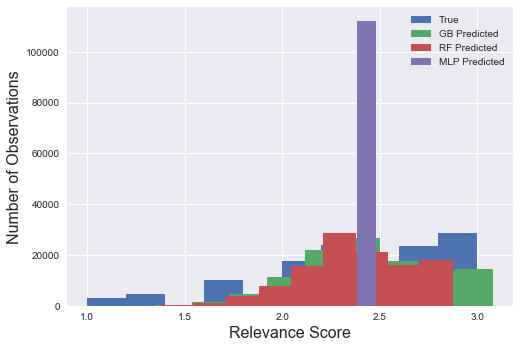

In [58]:
fig, ax = plt.subplots()
ax.hist(test['relevance'],bins = 10,label='True')
ax.hist(gb_pred,bins = 10,label='GB Predicted')
ax.hist(rf_pred,bins = 10,label='RF Predicted')
ax.hist(mlp_pred,bins = 10,label='MLP Predicted')
ax.set_ylabel('Number of Observations',fontsize=16)
ax.set_xlabel('Relevance Score',fontsize=16)
plt.legend()
plt.show()
fig.savefig('deep_learning_model/reports/fig/predicted_dist.png')

In [20]:
down_train = pd.read_csv('data/down_train.csv')

In [21]:
gb_down = GradientBoostingRegressor(n_estimators= 500 ,max_depth= 5, learning_rate= 0.025, loss='huber',alpha = 0.33)
gb_down.fit(down_train[features],down_train['relevance'])
gb_down_pred = gb_down.predict(test[test_features])
print('>> Down-sampling Result for Gradient Boosting Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], gb_down_pred)**0.5)

>> Down-sampling Result for Gradient Boosting Regressor <<
RMSE:  0.468010806589


In [59]:
rf_down = RandomForestRegressor(n_estimators=70, max_depth=10, random_state=2)
rf_down.fit(down_train[features],down_train['relevance'])
rf_down_pred = rf_down.predict(test[test_features])
print('>> Down-sampling Result for Random Forest Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], rf_down_pred)**0.5)

>> Down-sampling Result for Random Forest Regressor <<
RMSE:  0.464927204376


In [84]:
mlp_down = MLPRegressor(hidden_layer_sizes=(2000,10), activation='relu', solver='adam', alpha=0.0001, \
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, \
                   max_iter=1000, shuffle=True, random_state= 2 ,verbose=False, warm_start=False, \
                   momentum=0.9, nesterovs_momentum=True, early_stopping= False, validation_fraction=0.4, \
                   beta_1=0.1, beta_2=0.999, epsilon=1e-08)

mlp_down.fit(down_train[selected_feat],down_train['relevance'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.1,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2000, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.4, verbose=False,
       warm_start=False)

In [109]:
mlp_down_pred = mlp_down.predict(test[selected_feat])
print('>> Down-sampling Result for MLP Regressor <<')
print('RMSE: ',mean_squared_error(test['relevance'], mlp_down_pred)**0.5)

>> Down-sampling Result for MLP Regressor <<
RMSE:  0.542443670566


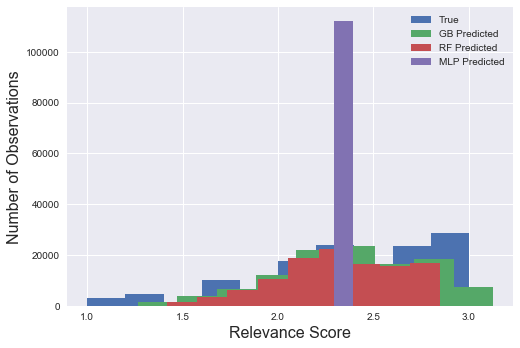

In [87]:
fig, ax = plt.subplots()
ax.hist(test['relevance'],bins = 10,label='True')
ax.hist(gb_down_pred,bins = 10,label='GB Predicted')
ax.hist(rf_down_pred,bins = 10,label='RF Predicted')
ax.hist(mlp_down_pred,bins = 10,label='MLP Predicted')
ax.set_ylabel('Number of Observations',fontsize=16)
ax.set_xlabel('Relevance Score',fontsize=16)
plt.legend()
plt.show()
fig.savefig('deep_learning_model/reports/fig/predicted_balanced_dist.png')

# Stack Result

In [100]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(train[features],train['relevance'],test_size=0.2, random_state=1)

In [101]:
gb_stack = GradientBoostingRegressor(n_estimators= 500 ,max_depth= 5, learning_rate= 0.025, loss='huber',alpha = 0.33)
gb_stack.fit(X_train,y_train)
gb_pred_ = gb_stack.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, gb_pred_)**0.5)

RMSE:  0.456836177136


In [102]:
rf_stack = RandomForestRegressor(n_estimators=70, max_depth=10, random_state=2)
rf_stack.fit(X_train,y_train)
rf_pred_ = rf_stack.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, rf_pred_)**0.5)

RMSE:  0.45198395725


In [103]:
import statsmodels.formula.api as sm
stack_df = pd.DataFrame({'gb':gb_pred_,'rf':rf_pred_,'true':y_test})
result = sm.ols(formula=" true~ gb + rf", data=stack_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   true   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     3009.
Date:                Wed, 19 Apr 2017   Prob (F-statistic):               0.00
Time:                        09:22:37   Log-Likelihood:                -9199.9
No. Observations:               14814   AIC:                         1.841e+04
Df Residuals:                   14811   BIC:                         1.843e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0587      0.036      1.617      0.106      -0.012       0.130
gb             0.5018      0.050     10.125      0.000       0.405       0.599
rf             0.4610      0.059      7.791      0.000       0.345       0.577
==============================================================================
Omnibus:                      535.786   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.823
Skew:                          -0.488   Prob(JB):                    6.85e-130
Kurtosis:                       3.102   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
stack_pred = 0.54*gb_pred + 0.46*rf_pred
print('RMSE: ',mean_squared_error(test['relevance'], stack_pred)**0.5)

RMSE:  0.458278658166


In [3]:
model_df = pd.read_csv('data/prediction_result.csv')

In [9]:
var = list(model_df)
for i in ['search_term_id','id','relevance']:
    var.remove(i)

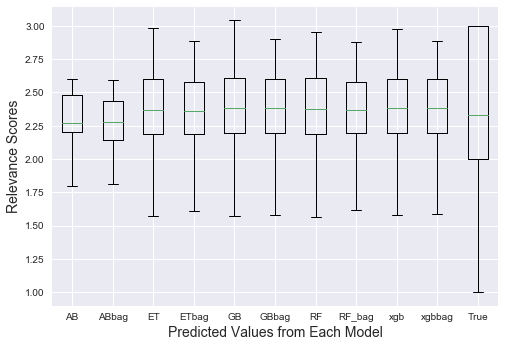

In [76]:
fig, ax = plt.subplots()
ax.boxplot([model_df.y_pred_AB,model_df.y_pred_ABbagging, model_df.y_pred_ET,\
             model_df.y_pred_ETbagging,model_df.y_pred_GB,model_df.y_pred_GBbagging,model_df.y_pred_rf,\
             model_df.y_pred_rfbagging,model_df.y_pred_xgb,model_df.y_pred_xgbbagging,test['relevance']])
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['AB', 'ABbag', 'ET','ETbag','GB','GBbag','RF','RF_bag','xgb','xgbbag','True'])
plt.ylabel('Relevance Scores', fontsize = 14)
plt.xlabel('Predicted Values from Each Model',fontsize=14)
plt.show()
fig.savefig('individual_report-Fran/fig/all_predicted.png')

In [80]:
import statsmodels.formula.api as sm
stack_data = pd.DataFrame({'abb':model_df.y_pred_ABbagging,'gb':model_df.y_pred_GB,\
                          'rf':model_df.y_pred_rfbagging,'id':model_df.id,'et':model_df.y_pred_ET,'xgb':model_df.y_pred_xgb})
test = pd.DataFrame({'relevance':test['relevance'], 'id':test['id']})
sd = pd.merge(stack_data,test,on='id')
result1 = sm.ols(formula=" relevance~ abb + gb+rf+et+xgb", data=sd).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              relevance   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     8688.
Date:                Thu, 20 Apr 2017   Prob (F-statistic):               0.00
Time:                        10:17:28   Log-Likelihood:                -70620.
No. Observations:              112067   AIC:                         1.413e+05
Df Residuals:                  112061   BIC:                         1.413e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0525      0.021     -2.543      0.011      -0.093      -0.012
abb            0.0055      0.025      0.215      0.830      -0.044       0.055
gb             0.4175      0.035     11.960      0.000       0.349       0.486
rf             0.0244      0.033      0.743      0.457      -0.040       0.089
et             0.3242      0.018     17.768      0.000       0.288       0.360
xgb            0.2525      0.039      6.509      0.000       0.176       0.328
==============================================================================
Omnibus:                     4249.807   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4752.108
Skew:                          -0.504   Prob(JB):                         0.00
Kurtosis:                       3.059   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
sp =  0.42*model_df.y_pred_GB + 0.32*model_df.y_pred_ET+0.26*model_df.y_pred_xgb
print('RMSE: ',mean_squared_error(test['relevance'], sp)**0.5)

RMSE:  0.454453822945
